# Diffractogramme
Dans cette tâche, on va déterminer les 3 premiers pics du diffractogramme pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å. Chaque pic est associé à plusieurs valeurs tels que l'intensité du pic, des indices hkl(relatif au plan de diffraction) ainsi que leur multiplicité et une distance. La multiplicité indique le nombre de plan ayant une distance identique entre eux.

In [43]:
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [44]:
mp_key="MykrkEqBZ7EQ2VUWndzndDME88749Z5b"; mp_id="mp-961706"; #Matériaux: TiSiPt

In [45]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
struc_conv = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
#On crée ici le calculateur avec le rayonnement indiqué dans la consigne.
#On utilise la maille conventionelle pour pouvoir comparer nos résultats avec les valeurs de The Material Project
XRD = XRDCalculator(1.54060) 
plan = XRD.get_pattern(struc_conv) 
hkl = plan.hkls 
d_hkl = plan.d_hkls 

In [47]:
# Prendre les 3 premiers pics. 

for i in range(3) : 
    print("\n")
    print("Pic de diffraction n°" + str(i + 1) +".\n")
    print("Intensité (scaled) = " + str(round(plan.y[i], 4)))
    print("2\u03F4 = " + str(round(plan.x[i], 4)) + "°")
    print("(h,k,l) = " +str(hkl[i][0]['hkl']))
    print("Distance entre les plans = " + str(round(d_hkl[i], 4)) + " Å")
    print("Multiplicité = " + str(hkl[i][0]['multiplicity']))
    



Pic de diffraction n°1.

Intensité (scaled) = 100.0
2ϴ = 26.1415°
(h,k,l) = (1, 1, 1)
Distance entre les plans = 3.4061 Å
Multiplicité = 8


Pic de diffraction n°2.

Intensité (scaled) = 18.1388
2ϴ = 30.2754°
(h,k,l) = (2, 0, 0)
Distance entre les plans = 2.9498 Å
Multiplicité = 6


Pic de diffraction n°3.

Intensité (scaled) = 75.147
2ϴ = 43.3458°
(h,k,l) = (2, 2, 0)
Distance entre les plans = 2.0858 Å
Multiplicité = 12


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

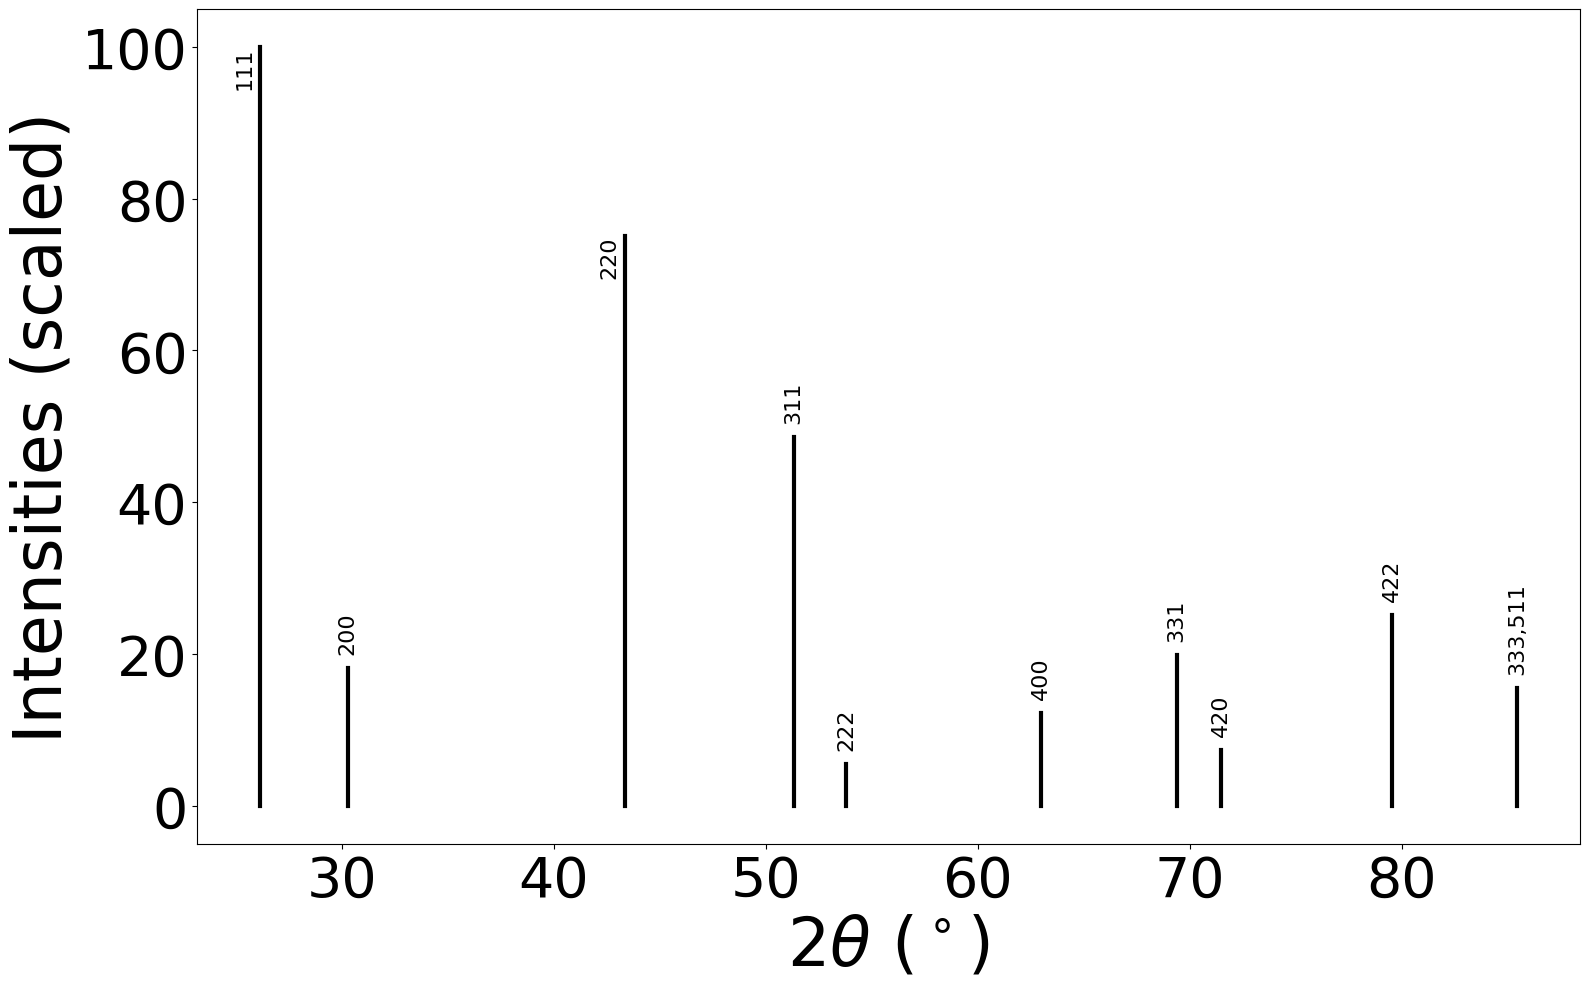

In [48]:
XRD.get_plot(struc_conv )

On voit donc clairement que les trois premiers pics sont les pics relatifs aux plans( (1,1,1), (2,0,0) et (2,2,0)). Ces données correspondent bien à celles reprises sur The Material Project.